## Check coregistration

In [2]:
import nighres
import os
import nibabel as nib
from nilearn import plotting
import numpy as np
%matplotlib inline

In [5]:
epi = './data/raw/bids/sub-01/ses-se/func/sub-01_ses-se_task-stop_run-1_bold.nii'
anat = './data/deriv/fmriprep_poor_bold2t1w/sub-01/anat/sub-01_T1w_preproc.nii.gz'

In [3]:
## Get median epi
def make_median_img(source):
    hdr = nib.load(source)
    medi = np.median(hdr.get_data(), 3)
    return nib.Nifti1Image(medi, affine=hdr.affine)

epi_median = make_median_img(epi)
nib.save(epi_median, filename='./tmp_epi_median.nii.gz')

In [16]:
reg_res = nighres.registration.embedded_antsreg(source_image=anat,
                                                target_image='./tmp_epi_median.nii.gz',
                                                run_rigid=True,
                                                run_affine=False,
                                                run_syn=False,
                                                rigid_iterations=0, 
                                                affine_iterations=0, 
                                                coarse_iterations=0, 
                                                medium_iterations=0, 
                                                fine_iterations=0,
                                                save_data=False)


Embedded ANTs Registration

Outputs will be saved to ./data/deriv/fmriprep_poor_bold2t1w/sub-01/anat/

Saving ./data/deriv/fmriprep_poor_bold2t1w/sub-01/anat/sub-01_T1w_preproc_tmp_srccoord.nii.gz

Saving ./data/deriv/fmriprep_poor_bold2t1w/sub-01/anat/sub-01_T1w_preproc_tmp_trgcoord.nii.gz
registering ./data/deriv/fmriprep_poor_bold2t1w/sub-01/anat/sub-01_T1w_preproc.nii.gz
 to ./tmp_epi_median.nii.gz
antsRegistration --collapse-output-transforms 1 --dimensionality 3 --initialize-transforms-per-stage 0 --interpolation Linear --output sub-01_T1w_preproc_tmp_syn --transform Rigid[ 0.1 ] --metric MI[ ./tmp_epi_median.nii.gz, ./data/deriv/fmriprep_poor_bold2t1w/sub-01/anat/sub-01_T1w_preproc.nii.gz, 1, 32, Random, 0.3 ] --convergence [ 0x0x0, 1e-06, 10 ] --smoothing-sigmas 3.0x2.0x1.0 --shrink-factors 4x2x1 --use-histogram-matching 0 --transform SyN[ 0.2, 4.0, 3.0 ] --metric MI[ ./tmp_epi_median.nii.gz, ./data/deriv/fmriprep_poor_bold2t1w/sub-01/anat/sub-01_T1w_preproc.nii.gz, 1, 32, Ran

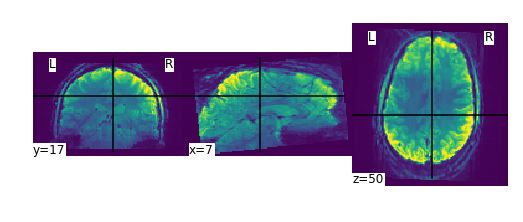

In [13]:
plotting.plot_img(epi_median)

In [17]:
reg_res

{'transformed_source': <nibabel.nifti1.Nifti1Image at 0x7f5e1d645b00>,
 'mapping': <nibabel.nifti1.Nifti1Image at 0x7f5e1d645cf8>,
 'inverse': <nibabel.nifti1.Nifti1Image at 0x7f5e1d645c50>}

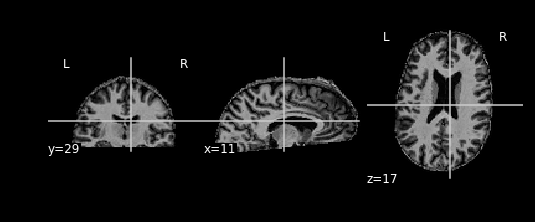

In [18]:
plotting.plot_anat(reg_res['transformed_source'])

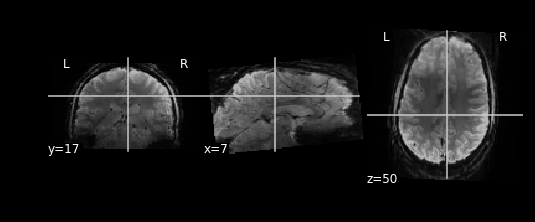

In [19]:
plotting.plot_anat(epi_median)

### Try to coregister anat to epi

In [6]:
reg_res = nighres.registration.embedded_antsreg(source_image=anat,
                                                target_image='./tmp_epi_median.nii.gz',
                                                run_rigid=True,
                                                run_affine=False,
                                                run_syn=False,
                                                rigid_iterations=1000, 
                                                affine_iterations=0, 
                                                coarse_iterations=0, 
                                                medium_iterations=0, 
                                                fine_iterations=0,
                                                save_data=False)


Embedded ANTs Registration


/usr/local/miniconda/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)



Outputs will be saved to ./data/deriv/fmriprep_poor_bold2t1w/sub-01/anat/

Saving ./data/deriv/fmriprep_poor_bold2t1w/sub-01/anat/sub-01_T1w_preproc_tmp_srccoord.nii.gz

Saving ./data/deriv/fmriprep_poor_bold2t1w/sub-01/anat/sub-01_T1w_preproc_tmp_trgcoord.nii.gz
registering ./data/deriv/fmriprep_poor_bold2t1w/sub-01/anat/sub-01_T1w_preproc.nii.gz
 to ./tmp_epi_median.nii.gz
antsRegistration --collapse-output-transforms 1 --dimensionality 3 --initialize-transforms-per-stage 0 --interpolation Linear --output sub-01_T1w_preproc_tmp_syn --transform Rigid[ 0.1 ] --metric MI[ ./tmp_epi_median.nii.gz, ./data/deriv/fmriprep_poor_bold2t1w/sub-01/anat/sub-01_T1w_preproc.nii.gz, 1, 32, Random, 0.3 ] --convergence [ 1000x1000x1000, 1e-06, 10 ] --smoothing-sigmas 3.0x2.0x1.0 --shrink-factors 4x2x1 --use-histogram-matching 0 --winsorize-image-intensities [ 0.001, 0.999 ]  --write-composite-transform 0


In [7]:
reg_res

{'transformed_source': <nibabel.nifti1.Nifti1Image at 0x7f8e6989db38>,
 'mapping': <nibabel.nifti1.Nifti1Image at 0x7f8e5f5c98d0>,
 'inverse': <nibabel.nifti1.Nifti1Image at 0x7f8e5f5c9710>}

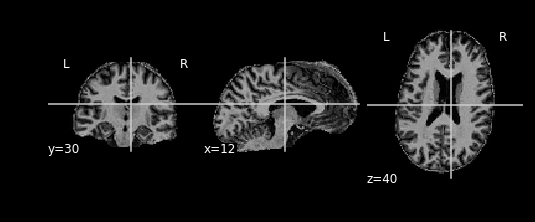

In [10]:
plotting.plot_anat(reg_res['transformed_source'], cut_coords=[12, 30, 40])

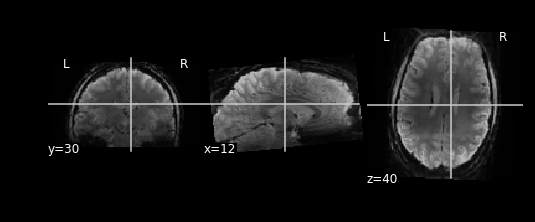

In [11]:
plotting.plot_anat(epi_median, cut_coords=[12, 30, 40])

### ran by fmriprep (new SM edition)

In [7]:
anat = './data/deriv/fmriprep/sub-01/anat/sub-01_T1w_space-mni_icbm152_t1_tal_nlin_asym_09a_brain_d4mm_preproc.nii.gz'
epi_r1 = './data/deriv/fmriprep/sub-01/ses-se/func/sub-01_ses-se_task-stop_run-1_bold_space-mni_icbm152_t1_tal_nlin_asym_09a_brain_d4mm_brainmask.nii.gz'

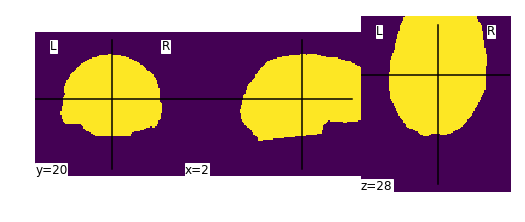

In [8]:
plotting.plot_img(epi_r1)

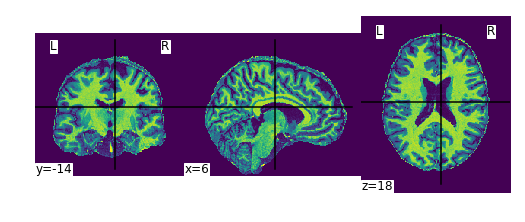

In [9]:
plotting.plot_img(anat)

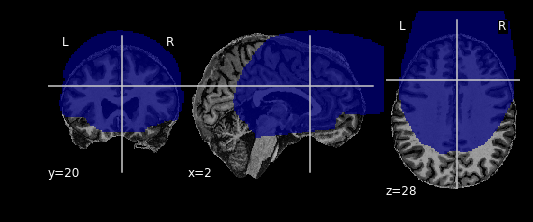

In [10]:
plotting.plot_roi(epi_r1, bg_img=anat)